### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## Practical activity: Convert, clean, and analyse data

**This is the solution to the activity.**

Having scraped and shared the specific data required by the executives, claims department, and clients of your organisation, you now need to share it with them. You know that none of the stakeholders involved are as tech- or data-savvy as you are, and that you need to share the data with them in a way they can understand and use. To this end, you’ve been asked to download your scraped data as a CSV file. 

Additionally, other data analysts at your organisation want access to your data, and have requested the data also be shared as JSON files. Your analytics department has also asked you to focus on the six continents on the table, and perform several calculations for each of them.

## 1. Import the libraries

In [1]:
# Import necessary libraries.
import requests
import pandas as pd
from bs4 import BeautifulSoup

## 2. Establish connection with URL

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
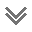

In [2]:
# Create a URL variable.
url = 'https://www.worldometers.info/coronavirus/'

# Create a requests variable.
r = requests.get(url)

# Make contact with the website.
if r.status_code == 200:
    html_doc = r.text
    
# Create a BeautifulSoup object.
soup = BeautifulSoup(html_doc)

# View the output.
print(soup.prettify())

## 3. Extract tabular data

In [3]:
# Extracting the contents of the table with the table id: 
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

# View the output.
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

## 4. Extract table headers

In [4]:
# Now we need to specify BeautifulSoup to go through the table and find everything 
# with a tr tag.
# Note: th = (table header), tr = (table row), and td = table column.
rows = table.find_all('tr', attrs={'style': ""})

# View the output.
rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>551,816,902</td>
 <td

In [5]:
# Storage for the extracted data.
output = []

column_names = ['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
               'New Deaths', 'Total Recovered', 'New Recovered',
               'Active Cases', 'Serious, Critical', 'Tot Cases/ 1M pop',
               'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population']

# Create a for loop statement.
for cases in rows:
    cases_data = cases.find_all('td')
    if cases_data:
        # Extract the text within each element.
        cases_text = [td.text for td in cases_data]
        output.append(dict(zip(column_names, cases_text)))
        
# View the output.
output

[{'Country,Other': '',
  'Total Cases': 'World',
  'New Cases': '551,816,902',
  'Total Deaths': '+72,379',
  'New Deaths': '6,356,249',
  'Total Recovered': '+115',
  'New Recovered': '527,268,049',
  'Active Cases': '+79,079',
  'Serious, Critical': '18,192,604',
  'Tot Cases/ 1M pop': '36,856',
  'Deaths/ 1M pop': '70,793',
  'Total Tests': '815.4',
  'Tests/ 1M pop': '',
  'Population': ''},
 {'Country,Other': '1',
  'Total Cases': 'USA',
  'New Cases': '89,236,449',
  'Total Deaths': '',
  'New Deaths': '1,042,291 ',
  'Total Recovered': '',
  'New Recovered': '84,810,554',
  'Active Cases': '',
  'Serious, Critical': '3,383,604',
  'Tot Cases/ 1M pop': '3,323',
  'Deaths/ 1M pop': '266,488',
  'Total Tests': '3,113',
  'Tests/ 1M pop': '1,050,907,600',
  'Population': '3,138,339'},
 {'Country,Other': '2',
  'Total Cases': 'India',
  'New Cases': '43,450,262',
  'Total Deaths': '',
  'New Deaths': '525,077 ',
  'Total Recovered': '',
  'New Recovered': '42,808,666',
  'Active Case

## 5. Convert extracted data into a Panda DataFrame

In [6]:
# Create a DataFrame directly from the output.
data = pd.DataFrame(output)

# View the DataFrame.
data.head()

Country,Other Total Cases    New Cases Total Deaths  New Deaths  \
0                     World  551,816,902      +72,379   6,356,249   
1             1         USA   89,236,449               1,042,291    
2             2       India   43,450,262                 525,077    
3             3      Brazil   32,283,345                 671,194    
4             4      France   30,950,513                 149,491    

  Total Recovered New Recovered Active Cases Serious, Critical  \
0            +115   527,268,049      +79,079        18,192,604   
1                    84,810,554                      3,383,604   
2                    42,808,666                        116,519   
3                    30,764,923                        847,228   
4                    29,603,879                      1,197,143   

  Tot Cases/ 1M pop Deaths/ 1M pop Total Tests  Tests/ 1M pop Population  
0            36,856         70,793       815.4                            
1             3,323        266,488       3,113  1,050,907,600  3,138,339  
2               698         30,882         373    861,489,400    612,298  
3             8,318        149,763       3,114     63,776,166    295,858  
4               869        472,090       2,280    271,490,188  4,141,057

## 6. Convert, clean and analyse the data

In [7]:
# Save the DataFrame as a CSV file without index.
data.to_csv('cases.csv', index=False)

In [8]:
# Create a JSON file.
import json

# Create a JSON file.
output_json = json.dumps(output)

# View the output.
output_json

'[{"Country,Other": "", "Total Cases": "World", "New Cases": "551,816,902", "Total Deaths": "+72,379", "New Deaths": "6,356,249", "Total Recovered": "+115", "New Recovered": "527,268,049", "Active Cases": "+79,079", "Serious, Critical": "18,192,604", "Tot Cases/ 1M pop": "36,856", "Deaths/ 1M pop": "70,793", "Total Tests": "815.4", "Tests/ 1M pop": "", "Population": ""}, {"Country,Other": "1", "Total Cases": "USA", "New Cases": "89,236,449", "Total Deaths": "", "New Deaths": "1,042,291 ", "Total Recovered": "", "New Recovered": "84,810,554", "Active Cases": "", "Serious, Critical": "3,383,604", "Tot Cases/ 1M pop": "3,323", "Deaths/ 1M pop": "266,488", "Total Tests": "3,113", "Tests/ 1M pop": "1,050,907,600", "Population": "3,138,339"}, {"Country,Other": "2", "Total Cases": "India", "New Cases": "43,450,262", "Total Deaths": "", "New Deaths": "525,077 ", "Total Recovered": "", "New Recovered": "42,808,666", "Active Cases": "", "Serious, Critical": "116,519", "Tot Cases/ 1M pop": "698",

In [9]:
# Save the JSON file to .json.
with open('cases_json.json', 'w') as f:
    json.dump(output, f)

In [10]:
# Read the JSON using Pandas, output to .csv.
pd.read_json(output_json).to_csv('cases_csv.csv', index=False)

In [11]:
# Import and read the CSV file.
data_csv = pd.read_csv('cases_csv.csv')

# View the data.
print(data_csv.head())

# Import and read the JSON file.
data_json = pd.read_json('cases_json.json')

# View the DataFrame. 
data_json.head()

   Country,Other Total Cases    New Cases Total Deaths  New Deaths  \
0            NaN       World  551,816,902      +72,379   6,356,249   
1            1.0         USA   89,236,449          NaN  1,042,291    
2            2.0       India   43,450,262          NaN    525,077    
3            3.0      Brazil   32,283,345          NaN    671,194    
4            4.0      France   30,950,513          NaN    149,491    

   Total Recovered New Recovered Active Cases Serious, Critical  \
0            115.0   527,268,049      +79,079        18,192,604   
1              NaN    84,810,554          NaN         3,383,604   
2              NaN    42,808,666          NaN           116,519   
3              NaN    30,764,923          NaN           847,228   
4              NaN    29,603,879          NaN         1,197,143   

  Tot Cases/ 1M pop Deaths/ 1M pop Total Tests  Tests/ 1M pop Population  
0            36,856         70,793       815.4            NaN        NaN  
1             3,323       

Country,Other Total Cases    New Cases Total Deaths  New Deaths  \
0                     World  551,816,902      +72,379   6,356,249   
1             1         USA   89,236,449               1,042,291    
2             2       India   43,450,262                 525,077    
3             3      Brazil   32,283,345                 671,194    
4             4      France   30,950,513                 149,491    

  Total Recovered New Recovered Active Cases Serious, Critical  \
0            +115   527,268,049      +79,079        18,192,604   
1                    84,810,554                      3,383,604   
2                    42,808,666                        116,519   
3                    30,764,923                        847,228   
4                    29,603,879                      1,197,143   

  Tot Cases/ 1M pop Deaths/ 1M pop Total Tests  Tests/ 1M pop Population  
0            36,856         70,793       815.4                            
1             3,323        266,488       3,113  1,050,907,600  3,138,339  
2               698         30,882         373    861,489,400    612,298  
3             8,318        149,763       3,114     63,776,166    295,858  
4               869        472,090       2,280    271,490,188  4,141,057

In [12]:
# View the CSV and JSON DataFrames.
print(data_csv.dtypes)
print(data_csv.columns)

print(data_json.dtypes)
print(data_json.columns)

Country,Other        float64
Total Cases           object
New Cases             object
Total Deaths          object
New Deaths            object
Total Recovered      float64
New Recovered         object
Active Cases          object
Serious, Critical     object
Tot Cases/ 1M pop     object
Deaths/ 1M pop        object
Total Tests           object
Tests/ 1M pop         object
Population            object
dtype: object
Index(['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious, Critical', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop',
       'Total Tests', 'Tests/ 1M pop', 'Population'],
      dtype='object')
Country,Other        object
Total Cases          object
New Cases            object
Total Deaths         object
New Deaths           object
Total Recovered      object
New Recovered        object
Active Cases         object
Serious, Critical    object
Tot Cases/ 1M pop    object
Deaths/ 1M pop  

In [13]:
# Create a subset.
data_report = data_csv[['Country,Other', 'Total Cases', 'Total Deaths',
                        'Total Recovered', 'Active Cases', 'Serious, Critical']]

# View the column names.
print(data_report.columns)
data_report

Index(['Country,Other', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Serious, Critical'],
      dtype='object')


Country,Other Total Cases Total Deaths  Total Recovered Active Cases  \
0              NaN       World      +72,379            115.0      +79,079   
1              1.0         USA          NaN              NaN          NaN   
2              2.0       India          NaN              NaN          NaN   
3              3.0      Brazil          NaN              NaN          NaN   
4              4.0      France          NaN              NaN          NaN   
..             ...         ...          ...              ...          ...   
221          222.0  Micronesia          NaN              NaN          NaN   
222          226.0        Niue          NaN              NaN          NaN   
223          228.0      Tuvalu          NaN              NaN          NaN   
224          230.0       China          +33              NaN          +65   
225            NaN      Total:      +72,379            115.0      +79,079   

    Serious, Critical  
0          18,192,604  
1           3,383,604  
2             116,519  
3             847,228  
4           1,197,143  
..                ...  
221                 5  
222                 1  
223                 3  
224               432  
225        18,192,604  

[226 rows x 6 columns]

In [14]:
# Determine missing values.
data_report.isnull().sum()

Country,Other          2
Total Cases            0
Total Deaths         216
Total Recovered      219
Active Cases         211
Serious, Critical     15
dtype: int64

In [15]:
# Save the DataFrame as a CSV file without index.
data_report.to_csv('cases_report.csv', index=False)

In [16]:
# View the saved CSV.
cases_report = pd.read_csv('cases_report.csv')

# View the DataFrame.
cases_report.head()

Country,Other Total Cases Total Deaths  Total Recovered Active Cases  \
0            NaN       World      +72,379            115.0      +79,079   
1            1.0         USA          NaN              NaN          NaN   
2            2.0       India          NaN              NaN          NaN   
3            3.0      Brazil          NaN              NaN          NaN   
4            4.0      France          NaN              NaN          NaN   

  Serious, Critical  
0        18,192,604  
1         3,383,604  
2           116,519  
3           847,228  
4         1,197,143